In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [2]:
data = pd.read_excel("innercity.xlsx")
data.head()

,cid,dayhours,price,room_bed,room_bath,gender,living_measure,lot_measure,ceil,coast,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,Female,3050.0,9440.0,1,0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,Male,670.0,3101.0,1,0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,Female,3040.0,2415.0,2,1,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,Male,1740.0,3721.0,2,0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,Female,1120.0,4590.0,1,0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   gender            21613 non-null  object 
 6   living_measure    21596 non-null  float64
 7   lot_measure       21571 non-null  float64
 8   ceil              21571 non-null  object 
 9   coast             21612 non-null  object 
 10  sight             21556 non-null  float64
 11  condition         21556 non-null  object 
 12  quality           21612 non-null  float64
 13  ceil_measure      21612 non-null  float64
 14  basement          21612 non-null  float64
 15  yr_built          21612 non-null  object 
 16  yr_renovated      21613 non-null  int64 

# Dataset Cleaning

In [4]:
data = data[~data.apply(lambda row: row.astype(str).str.contains('$', regex=False)).any(axis=1)]

In [5]:
# to check the number of null values 
pd.isnull(data).sum()

cid                   0
dayhours              0
price                 0
room_bed             66
room_bath            66
gender                0
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    124
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [6]:
# Removing all Null Values
data = data.dropna()

# Convert 'dayhours' to datetime

In [7]:
data['dayhours'] = pd.to_datetime(data['dayhours'])

data['year'] = data['dayhours'].dt.year
data['month'] = data['dayhours'].dt.month
data['day'] = data['dayhours'].dt.day
data['hour'] = data['dayhours'].dt.hour

In [8]:
# Remove the original 'dayhours' column
data = data.drop(columns=['dayhours'])

In [9]:
# Drop 'cid' column
data = data.drop(columns=['cid'])

In [10]:
data.head()

,price,room_bed,room_bath,gender,living_measure,lot_measure,ceil,coast,sight,condition,...,lat,long,living_measure15,lot_measure15,furnished,total_area,year,month,day,hour
0,600000,4.0,1.75,Female,3050.0,9440.0,1,0,0.0,3,...,47.7228,-122.183,2020.0,8660.0,0.0,12490,2015,4,27,0
1,190000,2.0,1.00,Male,670.0,3101.0,1,0,0.0,4,...,47.5546,-122.274,1660.0,4100.0,0.0,3771,2015,3,17,0
2,735000,4.0,2.75,Female,3040.0,2415.0,2,1,4.0,3,...,47.5188,-122.256,2620.0,2433.0,0.0,5455,2014,8,20,0
3,257000,3.0,2.50,Male,1740.0,3721.0,2,0,0.0,3,...,47.3363,-122.213,2030.0,3794.0,0.0,5461,2014,10,10,0
4,450000,2.0,1.00,Female,1120.0,4590.0,1,0,0.0,3,...,47.5663,-122.285,1120.0,5100.0,0.0,5710,2015,2,18,0


# Check the duplicate values if any

In [11]:
# Find and display duplicate rows based on all columns
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [price, room_bed, room_bath, gender, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area, year, month, day, hour]
Index: []

[0 rows x 26 columns]


In [12]:
data.describe()

,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished,year,month,day,hour
count,2.128800e+04,21288.000000,21288.000000,21288.000000,2.128800e+04,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.000000,21288.0
mean,5.399826e+05,3.370678,2.114395,2080.089346,1.510815e+04,0.234216,7.657976,1788.949267,291.140079,83.721768,98077.916808,47.559996,1987.143414,12761.672773,0.197059,2014.323046,6.571308,15.682497,0.0
std,3.656028e+05,0.930123,0.768666,917.696381,4.142870e+04,0.765875,1.176386,827.586143,442.475889,400.127640,53.514731,0.138578,685.795270,27254.999989,0.397787,0.467651,3.114587,8.631272,0.0
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000,2014.000000,1.000000,1.000000,0.0
25%,3.210202e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.470675,1490.000000,5100.000000,0.000000,2014.000000,4.000000,8.000000,0.0
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571700,1840.000000,7620.000000,0.000000,2014.000000,6.000000,16.000000,0.0
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068250e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.677925,2360.000000,10083.000000,0.000000,2015.000000,9.000000,23.000000,0.0
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000,2015.000000,12.000000,31.000000,0.0


# EDA (Exploratory Data Analysis)

## Visualize the distribution of the target variable 'price'

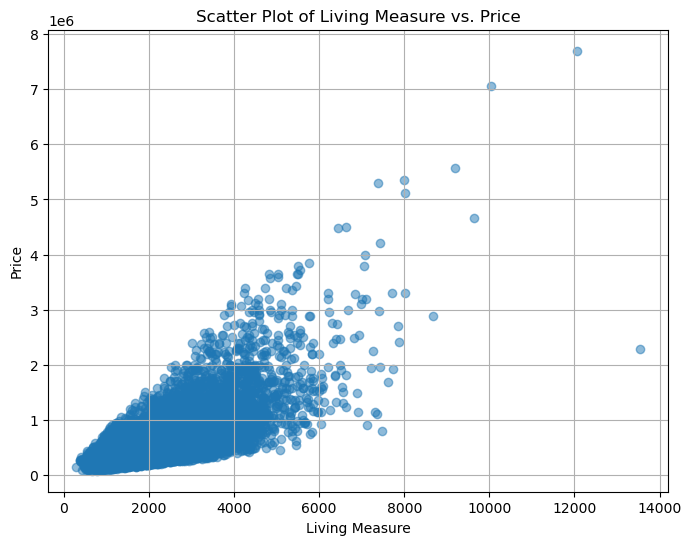

In [13]:
living_measure = data['living_measure']
price = data['price']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(living_measure, price, alpha=0.5)
plt.title('Scatter Plot of Living Measure vs. Price')
plt.xlabel('Living Measure')
plt.ylabel('Price')
plt.grid(True)
plt.show()


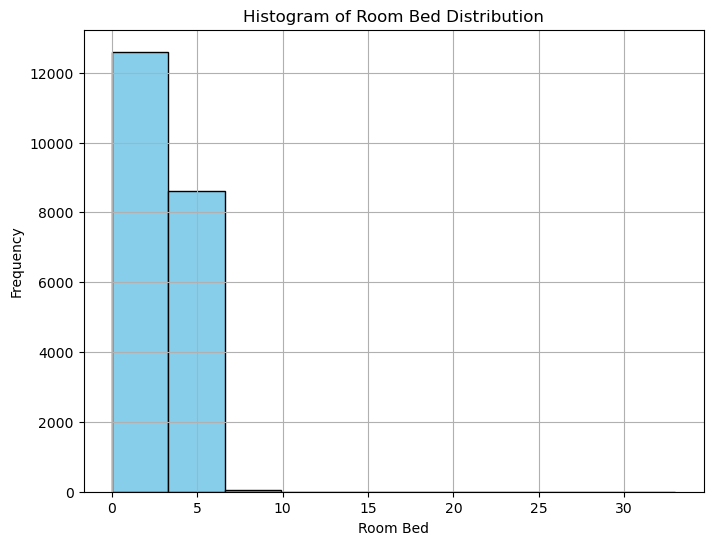

In [14]:
room_bed = data['room_bed']

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(room_bed, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Room Bed Distribution')
plt.xlabel('Room Bed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


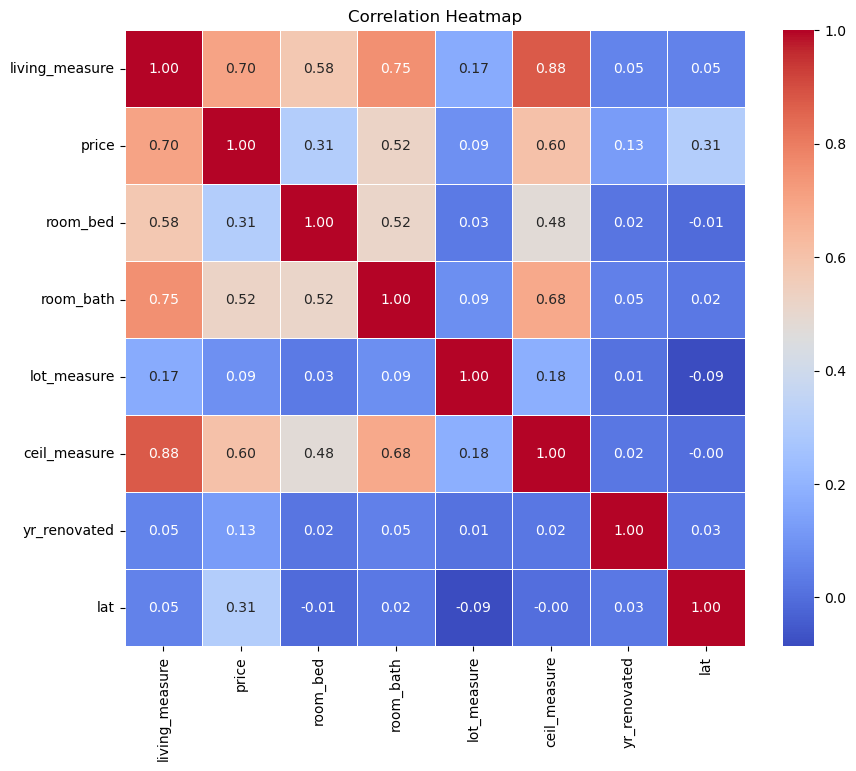

In [15]:
numerical_columns = ['living_measure', 'price', 'room_bed', 'room_bath', 'lot_measure', 'ceil_measure', 'coast', 'yr_built', 'yr_renovated', 'lat', 'long', 'total_area']
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Selecting Features

In [16]:
# Split the data into features (X) and the target (y)
X = data.drop(columns=['price'])
Y = data['price']

In [17]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Building

## Applying Linear Regression

In [18]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'Male'

In [ ]:
sns.distplot((y_test-y_pred),bins=50)
plt.title('Distplot of Linear Regression')
plt.show()

In [ ]:
model.score(X_test, y_test)

## Model Interpretation

In [ ]:
coefficients = model.coef_
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

## Applying Random Forest Method

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

rf_predictions = regressor.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [ ]:
sns.distplot((y_test-y_pred),bins=50)
plt.title('Distplot of Random Forest Model')
plt.show()

In [ ]:
regressor.score(X_test, y_test)

# Evaluation

In [ ]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error(MSE):", mse)
print("R-squared (R2) Score:", r2)

## Model Interpretation

In [ ]:
coefficients = model.coef_
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

In [ ]:
# Define a dictionary for the new data point
new_data_point = {
    'room_bed': 3,
    'room_bath': 2,
    'living_measure': 1800,
    'lot_measure': 6000,
    'ceil': 1,
    'coast': 0,
    'sight': 0,
    'condition': 4,
    'quality': 7,
    'ceil_measure': 1800,
    'basement': 0,  
    'yr_built': 1995,
    'yr_renovated': 0,
    'zipcode': 98034,
    'lat': 47.7228,
    'long': -122.183,
    'living_measure15': 1800,
    'lot_measure15': 6000,
    'furnished': 0,
    'total_area': 7800,
    'year': 2023,
    'month': 10,
    'day': 15,
    'hour': 14
}

In [ ]:
# Convert the dictionary to a DataFrame
new_data = pd.DataFrame([new_data_point])

In [ ]:
# Predict the price for the new data point using the trained model
predicted_price = model.predict(new_data)

In [ ]:
print("Predicted Price:", predicted_price[0])

## The predicted price is approximately 806552.51.